In [1]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 150

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
dataset = torchvision.datasets.MNIST('./MNIST_DATA2',
               download=True)

In [4]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST_DATA2
    Split: Train

In [5]:
indices = dataset.targets == 7

dataset.data, dataset.targets = dataset.data[indices], dataset.targets[indices]


In [6]:
train_set = dataset.data[:5265]
val_set = dataset.data[5265:]

In [29]:
train_set.size()

torch.Size([5265, 28, 28])

In [30]:
train_set.size()

torch.Size([5265, 28, 28])

In [31]:
train_set = train_set.float()

In [32]:
val_set = val_set.float()

In [33]:
#train_set = (train_set/train_set.view(-1,28*28).sum(dim=1).view(-1,1,1))

In [12]:
train_set = train_set / 255.

In [13]:
#val_set = (val_set/val_set.view(-1,28*28).sum(dim=1).view(-1,1,1))

In [14]:
val_set = val_set / 255.

In [15]:
mean_image = torch.mean(torch.Tensor.float(train_set), dim=0) / 255.

In [16]:
mean_norm_image = mean_image/mean_image.sum()


In [17]:
mean_norm_image.sum()

tensor(1.0000)

In [18]:
import ot


In [129]:
reg = 0.001

In [123]:
train_set = train_set.numpy().astype(np.float64)
train_set = np.divide(train_set,np.sum(train_set.reshape(-1,28*28),axis=1).reshape(-1,1,1))

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [99]:
train_set[0].sum()

1.0

In [130]:
barycenter = ot.bregman.convolutional_barycenter2d(train_set[:30], reg,verbose=True,numItermax=1000000)

    1|3.204580e-01|
   11|6.524954e-03|
   21|2.835898e-03|
   31|1.785533e-03|
   41|1.562359e-03|
   51|1.326328e-03|
   61|1.142712e-03|
   71|9.331903e-04|
   81|8.941654e-04|
   91|9.321667e-04|
  101|9.294307e-04|
  111|8.554048e-04|
  121|7.174194e-04|
  131|5.815821e-04|
  141|5.173642e-04|
  151|4.980546e-04|
  161|4.763210e-04|
  171|4.487557e-04|
  181|4.232187e-04|
  191|4.003909e-04|
  201|3.910915e-04|
  211|3.705069e-04|
  221|3.378287e-04|
  231|3.032556e-04|
  241|2.761848e-04|
  251|2.574665e-04|
  261|2.451379e-04|
  271|2.341681e-04|
  281|2.216115e-04|
  291|2.059821e-04|
  301|1.873140e-04|
  311|1.670358e-04|
  321|1.478496e-04|
  331|1.311146e-04|
  341|1.173300e-04|
  351|1.063795e-04|
  361|9.790050e-05|
  371|9.436333e-05|
  381|9.233132e-05|
  391|9.035411e-05|
  401|8.819472e-05|
  411|8.571685e-05|
  421|8.294704e-05|
  431|7.986389e-05|
  441|7.785967e-05|
  451|7.632090e-05|
  461|7.464042e-05|
  471|7.259978e-05|
  481|7.023484e-05|
  491|6.759217e-05|


 4121|2.080740e-07|
 4131|2.080732e-07|
 4141|2.080614e-07|
 4151|2.080384e-07|
 4161|2.080045e-07|
 4171|2.079596e-07|
 4181|2.079037e-07|
 4191|2.078370e-07|
 4201|2.077664e-07|
 4211|2.076859e-07|
 4221|2.075946e-07|
 4231|2.074926e-07|
 4241|2.073897e-07|
 4251|2.072770e-07|
 4261|2.071536e-07|
 4271|2.070197e-07|
 4281|2.068752e-07|
 4291|2.067211e-07|
 4301|2.065568e-07|
 4311|2.063823e-07|
 4321|2.061977e-07|
 4331|2.060032e-07|
 4341|2.057988e-07|
 4351|2.055847e-07|
 4361|2.053611e-07|
 4371|2.051279e-07|
 4381|2.048854e-07|
 4391|2.046336e-07|
 4401|2.043728e-07|
 4411|2.041057e-07|
 4421|2.038374e-07|
 4431|2.035610e-07|
 4441|2.032809e-07|
 4451|2.029921e-07|
 4461|2.026945e-07|
 4471|2.023884e-07|
 4481|2.020739e-07|
 4491|2.017511e-07|
 4501|2.014201e-07|
 4511|2.010811e-07|
 4521|2.007342e-07|
 4531|2.003795e-07|
 4541|2.000172e-07|
 4551|1.996474e-07|
 4561|1.992702e-07|
 4571|1.988858e-07|
 4581|1.984943e-07|
 4591|1.980958e-07|
 4601|1.976910e-07|
 4611|1.972796e-07|


 8321|3.393019e-08|
 8331|3.373842e-08|
 8341|3.354768e-08|
 8351|3.335796e-08|
 8361|3.316926e-08|
 8371|3.298159e-08|
 8381|3.279492e-08|
 8391|3.260927e-08|
 8401|3.242461e-08|
 8411|3.224096e-08|
 8421|3.205829e-08|
 8431|3.187662e-08|
 8441|3.169593e-08|
 8451|3.151621e-08|
 8461|3.133747e-08|
 8471|3.115971e-08|
 8481|3.098290e-08|
 8491|3.080706e-08|
 8501|3.063217e-08|
 8511|3.045823e-08|
 8521|3.028524e-08|
 8531|3.011319e-08|
 8541|2.994208e-08|
 8551|2.977190e-08|
 8561|2.960265e-08|
 8571|2.943432e-08|
 8581|2.926691e-08|
 8591|2.910041e-08|
 8601|2.893483e-08|
 8611|2.877014e-08|
 8621|2.860636e-08|
 8631|2.844348e-08|
 8641|2.828149e-08|
 8651|2.812038e-08|
 8661|2.796016e-08|
 8671|2.780082e-08|
 8681|2.764247e-08|
 8691|2.748503e-08|
 8701|2.732845e-08|
 8711|2.717273e-08|
 8721|2.701787e-08|
 8731|2.686386e-08|
 8741|2.671070e-08|
 8751|2.655837e-08|
 8761|2.640689e-08|
 8771|2.625624e-08|
 8781|2.610642e-08|
 8791|2.595742e-08|
 8801|2.580925e-08|
 8811|2.566189e-08|


12501|3.004049e-09|
12511|2.986562e-09|
12521|2.969177e-09|
12531|2.951893e-09|
12541|2.934709e-09|
12551|2.917626e-09|
12561|2.900641e-09|
12571|2.883756e-09|
12581|2.866969e-09|
12591|2.850279e-09|
12601|2.833687e-09|
12611|2.817191e-09|
12621|2.800791e-09|
12631|2.784487e-09|
12641|2.768277e-09|
12651|2.752162e-09|
12661|2.736141e-09|
12671|2.720213e-09|
12681|2.704377e-09|
12691|2.688634e-09|
12701|2.672982e-09|
12711|2.657421e-09|
12721|2.641951e-09|
12731|2.626571e-09|
12741|2.611281e-09|
12751|2.596079e-09|
12761|2.580966e-09|
12771|2.565941e-09|
12781|2.551004e-09|
12791|2.536153e-09|
12801|2.521389e-09|
12811|2.506710e-09|
12821|2.492118e-09|
12831|2.477610e-09|
12841|2.463186e-09|
12851|2.448847e-09|
12861|2.434591e-09|
12871|2.420418e-09|
12881|2.406327e-09|
12891|2.392319e-09|
12901|2.378392e-09|
12911|2.364546e-09|
12921|2.350781e-09|
12931|2.337096e-09|
12941|2.323490e-09|
12951|2.309964e-09|
12961|2.296517e-09|
12971|2.283148e-09|
12981|2.269857e-09|
12991|2.256643e-09|


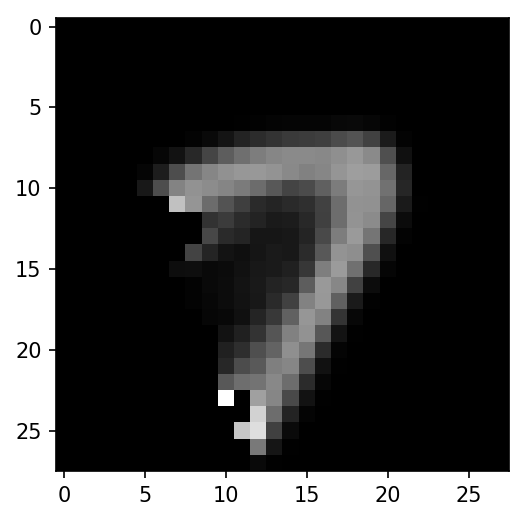

In [131]:
plt.imshow(barycenter,cmap='gray')

In [20]:
import pickle

In [40]:
import pickle

In [126]:
with open(r"vae_mnist_v3_barycenter_extreme.pickle", "wb") as output_file:
    pickle.dump(barycenter, output_file)

In [16]:
with open(r"vae_mnist_v3_barycenter.pickle", "rb") as input_file:
    barycenter = pickle.load(input_file)

In [11]:
#with open(r"vae_mnist_v2.pickle", "wb") as output_file:
#    pickle.dump(mean_norm_image.numpy(), output_file)

In [12]:
with open(r"vae_mnist_v2.pickle", "rb") as input_file:
    mean_norm_image = pickle.load(input_file)

In [24]:
train_set[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

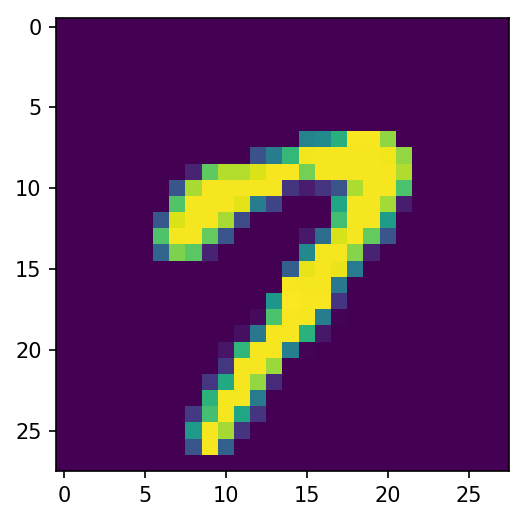

In [48]:
plt.imshow(train_set[0])

In [95]:
val_loader = torch.utils.data.DataLoader(
        val_set,
        batch_size=128,
        shuffle=True)

In [96]:
train_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=2000,
        shuffle=True)

In [94]:
for i,x in enumerate(val_loader):
    if i < 1:
        print(x[0])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [51]:
#testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
#                   transform=torchvision.transforms.ToTensor(),
#                   train=False,
#                   download=False)

In [52]:
#test_loader = torch.utils.data.DataLoader(
#        testdataset,
#        batch_size=1000,
#        shuffle=True)

In [7]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 24)
        self.bn1     = nn.BatchNorm1d(24)
        self.linear2 = nn.Linear(24,  48)
        self.bn2     = nn.BatchNorm1d(48)
        self.linear3 = nn.Linear(48, 784)

    def forward(self, z):
        z = F.relu(self.bn1(self.linear1(z)))
        z = F.relu(self.bn2(self.linear2(z)))
        z = torch.sigmoid(self.linear3(z))
        return z.reshape((-1, 28, 28))



In [8]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.linear1 = nn.Linear(784, 48)
        self.bn1     = nn.BatchNorm1d(48)
        self.linear2 = nn.Linear(48,  24)
        self.bn2     = nn.BatchNorm1d(24)
    
        self.linear_mu = nn.Linear(24, latent_dims)
        self.linear_std = nn.Linear(24, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        #print(x.size())
        x = F.relu(self.bn1(self.linear1(x)))
        x = F.relu(self.bn2(self.linear2(x)))
        mu =  self.linear_mu(x)
        sigma = torch.exp(self.linear_std(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

In [9]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


In [10]:
def validate(autoencoder, valdata):
    val_loss = 0
    with torch.no_grad():
        for x in valdata:
            x = x.to(device)
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum() + autoencoder.encoder.kl
            val_loss += loss
    
    return val_loss

In [11]:
def train(autoencoder, data, epochs=1000):
    opt = torch.optim.Adam(autoencoder.parameters(),lr=1e-3)
    patience = 0
    min_loss = 9999999999.9
    patience = 0
    for epoch in range(epochs):
                
        for x in train_loader:
            x = x.to(device) # GPU
            #print(x[0])
            opt.zero_grad()
            x_hat = autoencoder(x)
            #print(x.shape)
            #print(x_hat.shape)
            loss = ((x - x_hat)**2).sum() + autoencoder.encoder.kl
            #print(loss)
            loss.backward()
            opt.step()
        val_loss = validate(autoencoder, val_loader)
        if val_loss < min_loss:
            patience = 0
            print(val_loss)
            torch.save(vae.state_dict(), "./MNIST_VAE_validated_v3.h5")
            min_loss = val_loss
        else:
            patience += 1
            print(val_loss, f"patience limit {patience}")
            if patience > 10:
                print("patience limit exceeded, exiciting")
                break
    return autoencoder


In [12]:
latent_dims = 2
vae = VariationalAutoencoder(latent_dims).to(device) # GPU
#vae = train(vae, train_loader)


In [13]:
vae.load_state_dict(torch.load("./MNIST_VAE_validated_v3.h5"))

<All keys matched successfully>

In [14]:
vae.eval()

VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (linear1): Linear(in_features=784, out_features=48, bias=True)
    (bn1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear2): Linear(in_features=48, out_features=24, bias=True)
    (bn2): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear_mu): Linear(in_features=24, out_features=2, bias=True)
    (linear_std): Linear(in_features=24, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=2, out_features=24, bias=True)
    (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear2): Linear(in_features=24, out_features=48, bias=True)
    (bn2): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear3): Linear(in_features=48, out_features=784, bias=True)
  )
)

In [75]:
%matplotlib inline

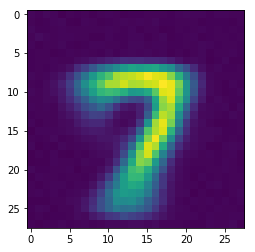

In [91]:
for i, (x,y) in enumerate(test_loader):
    if i>0:
        break
    x.to(device)
    #print(vae(x[0].to(device)).view(28,28).size())
    #plt.imshow(x[3].view(28,28))
    #print(x[7].view(28,28))
    plt.imshow(vae(x[150].view(1,28,28).to(device)).cpu().detach().view(28,28))

In [105]:
testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

In [106]:
indices = testdataset.targets == 5

testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]

In [107]:
testdataset = testdataset.data

In [108]:
testdataset = testdataset / 255.

In [109]:
#testdataset.data = (testdataset.data/testdataset.data.view(-1,28*28).sum(dim=1).view(-1,1,1))

In [110]:
test_loader = torch.utils.data.DataLoader(
        testdataset,
        batch_size=1000,
        shuffle=False)

torch.Size([28, 28])


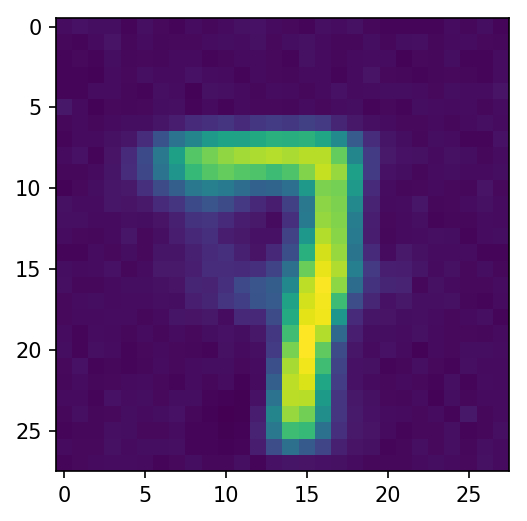

In [115]:
for i, x in enumerate(test_loader):
    if i>0:
        break
    print(x[0].shape)
    x.to(device)
    #print(vae(x[0].to(device)).view(28,28).size())
    #plt.imshow(x[3].view(28,28))
    #print(x[7].view(28,28))
    plt.imshow(vae(x[0].view(1,28,28).to(device)).cpu().detach().view(28,28))

In [117]:
#wasserstein_list = np.array([])
loss_list = np.array([])
for i, x in enumerate(test_loader):

    VAE_loss = torch.mean((vae(x.to(device)).view(-1,784)- x.to(device).view(-1,784))**2,dim=1).data.cpu().numpy()
    print(VAE_loss.shape)
    loss_list = np.append(loss_list,VAE_loss)

(892,)


In [118]:
loss_list.shape

(892,)

In [119]:
loss_list

array([0.11636107, 0.10044675, 0.08130879, 0.0869129 , 0.08962652,
       0.08629213, 0.04877826, 0.08430345, 0.11950885, 0.08017706,
       0.07566682, 0.11987489, 0.06865868, 0.08718376, 0.09700639,
       0.11955958, 0.12282627, 0.08919144, 0.06494998, 0.10506482,
       0.10171795, 0.06077337, 0.05165723, 0.09274707, 0.09094461,
       0.07686616, 0.05316711, 0.06135918, 0.08203654, 0.08558436,
       0.13150294, 0.09059324, 0.07783998, 0.10560147, 0.10548878,
       0.11887127, 0.10084756, 0.09155194, 0.10972897, 0.09028623,
       0.11017514, 0.08643797, 0.12833793, 0.11265715, 0.08267856,
       0.05919086, 0.09662101, 0.10090061, 0.06226081, 0.0864726 ,
       0.06643549, 0.09085035, 0.0847571 , 0.08905272, 0.09307483,
       0.10608397, 0.07540499, 0.10050984, 0.06810126, 0.09499248,
       0.1235119 , 0.09975673, 0.05823877, 0.07070096, 0.10740227,
       0.10510773, 0.12918755, 0.09229111, 0.16099277, 0.13459937,
       0.10834285, 0.06436986, 0.10536233, 0.06587309, 0.05133

In [121]:
with open(r"vae_mnist_v3_loss_five.pickle", "wb") as output_file:
    pickle.dump(loss_list, output_file)

In [15]:
def get_loss(digit):
    print("begin")
    testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

    indices = testdataset.targets == digit

    testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]

    test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1000,
            shuffle=False)

    loss_list = np.array([])
    for i, (x,y) in enumerate(test_loader):

        VAE_loss = torch.mean((vae(x.to(device)).view(-1,784)- x.to(device).view(-1,784))**2,dim=1).data.cpu().numpy()
        print(VAE_loss.shape)
        loss_list = np.append(loss_list,VAE_loss)


    return loss_list

In [21]:
loss_five = get_loss(5)

begin
(892,)


In [20]:
loss_seven = get_loss(7)

begin
(1000,)
(28,)


In [16]:
loss_nine = get_loss(9)

begin
(1000,)
(9,)


In [18]:
import pickle

In [19]:
with open(r"vae_mnist_v3_loss_nine.pickle", "wb") as output_file:
    pickle.dump(loss_nine, output_file)

(array([128., 418., 276.,  99.,  52.,  20.,   8.,   5.,   2.,   1.]),
 array([0.01983533, 0.03394691, 0.04805848, 0.06217005, 0.07628162,
        0.09039319, 0.10450476, 0.11861633, 0.13272791, 0.14683948,
        0.16095105]),
 <a list of 10 Patch objects>)

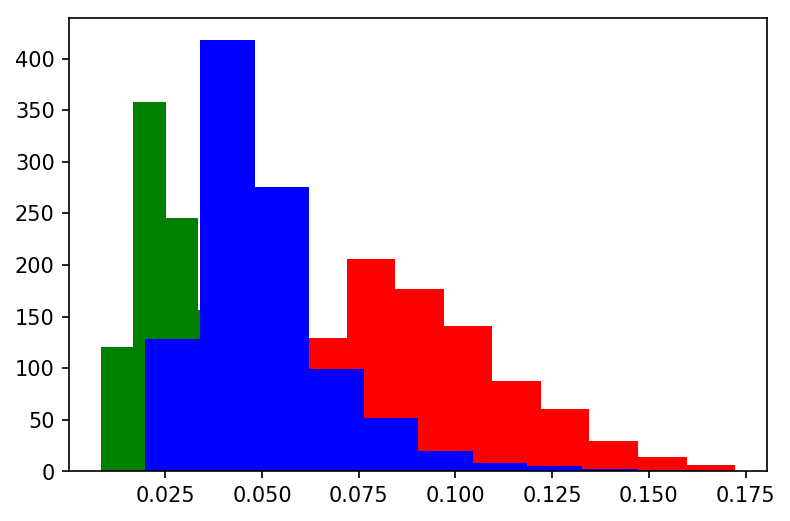

In [22]:
plt.hist(loss_five,color='r')
plt.hist(loss_seven,color='g')
plt.hist(loss_nine,color='b')

In [77]:
from geomloss import SamplesLoss

loss = SamplesLoss(loss="sinkhorn", p=2, blur=.05)

In [79]:
from scipy.stats import wasserstein_distance

In [80]:
from scipy.stats import pearsonr

In [41]:
test_loader = torch.utils.data.DataLoader(
        testdataset,
        batch_size=1,
        shuffle=False)

In [47]:
wasserstein_list = np.array([])
wasserstein_scipy_list = np.array([])
for i, (x,y) in enumerate(test_loader):
    print(i)
    #print(vae(x[0].to(device)).view(28,28).size())
    #print(x[0].to(device).view(28,28).size())
    #vfunc = np.vectorize(loss,signature='(i,j,k),(j,k)->(i)')
    #print(x.to(device).view(28,28).size())
    #print(mean_image.size())
    #print(loss(x.view(28,28).to(device),mean_image.to(device)).data.cpu().numpy())
    norm_img = x/x.sum()
    print(norm_img.sum(), norm_img.size())
    #wasserstein_list = np.append(wasserstein_list,loss(x.view(28,28).to(device),mean_image.to(device)).data.cpu().numpy())
    #wasserstein_scipy_list = np.append(wasserstein_scipy_list,wasserstein_distance(x.view(784).data.cpu().numpy(),mean_image.view(784).data.cpu().numpy()))
    #print(x[0])
    #print(mean_image)

0
tensor(1.0000) torch.Size([1, 1, 28, 28])
1
tensor(1.) torch.Size([1, 1, 28, 28])
2
tensor(1.0000) torch.Size([1, 1, 28, 28])
3
tensor(1.) torch.Size([1, 1, 28, 28])
4
tensor(1.0000) torch.Size([1, 1, 28, 28])
5
tensor(1.0000) torch.Size([1, 1, 28, 28])
6
tensor(1.) torch.Size([1, 1, 28, 28])
7
tensor(1.0000) torch.Size([1, 1, 28, 28])
8
tensor(1.) torch.Size([1, 1, 28, 28])
9
tensor(1.0000) torch.Size([1, 1, 28, 28])
10
tensor(1.0000) torch.Size([1, 1, 28, 28])
11
tensor(1.) torch.Size([1, 1, 28, 28])
12
tensor(1.) torch.Size([1, 1, 28, 28])
13
tensor(1.0000) torch.Size([1, 1, 28, 28])
14
tensor(1.0000) torch.Size([1, 1, 28, 28])
15
tensor(1.0000) torch.Size([1, 1, 28, 28])
16
tensor(1.) torch.Size([1, 1, 28, 28])
17
tensor(1.) torch.Size([1, 1, 28, 28])
18
tensor(1.) torch.Size([1, 1, 28, 28])
19
tensor(1.) torch.Size([1, 1, 28, 28])
20
tensor(1.0000) torch.Size([1, 1, 28, 28])
21
tensor(1.) torch.Size([1, 1, 28, 28])
22
tensor(1.0000) torch.Size([1, 1, 28, 28])
23
tensor(1.0000) t

465
tensor(1.0000) torch.Size([1, 1, 28, 28])
466
tensor(1.0000) torch.Size([1, 1, 28, 28])
467
tensor(1.) torch.Size([1, 1, 28, 28])
468
tensor(1.) torch.Size([1, 1, 28, 28])
469
tensor(1.) torch.Size([1, 1, 28, 28])
470
tensor(1.) torch.Size([1, 1, 28, 28])
471
tensor(1.0000) torch.Size([1, 1, 28, 28])
472
tensor(1.) torch.Size([1, 1, 28, 28])
473
tensor(1.) torch.Size([1, 1, 28, 28])
474
tensor(1.0000) torch.Size([1, 1, 28, 28])
475
tensor(1.0000) torch.Size([1, 1, 28, 28])
476
tensor(1.) torch.Size([1, 1, 28, 28])
477
tensor(1.) torch.Size([1, 1, 28, 28])
478
tensor(1.0000) torch.Size([1, 1, 28, 28])
479
tensor(1.) torch.Size([1, 1, 28, 28])
480
tensor(1.) torch.Size([1, 1, 28, 28])
481
tensor(1.0000) torch.Size([1, 1, 28, 28])
482
tensor(1.0000) torch.Size([1, 1, 28, 28])
483
tensor(1.) torch.Size([1, 1, 28, 28])
484
tensor(1.0000) torch.Size([1, 1, 28, 28])
485
tensor(1.) torch.Size([1, 1, 28, 28])
486
tensor(1.0000) torch.Size([1, 1, 28, 28])
487
tensor(1.0000) torch.Size([1, 1,

In [170]:
pearsonr_test = pearsonr(loss_list, wasserstein_list)


In [171]:
pearsonr_test

(0.7356332888285851, 1.0019796164810784e-152)

In [172]:
pearsonr_test

(0.7356332888285851, 1.0019796164810784e-152)

In [173]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

Text(0.06, 1.2, 'Reference 7, evaluated on 5')

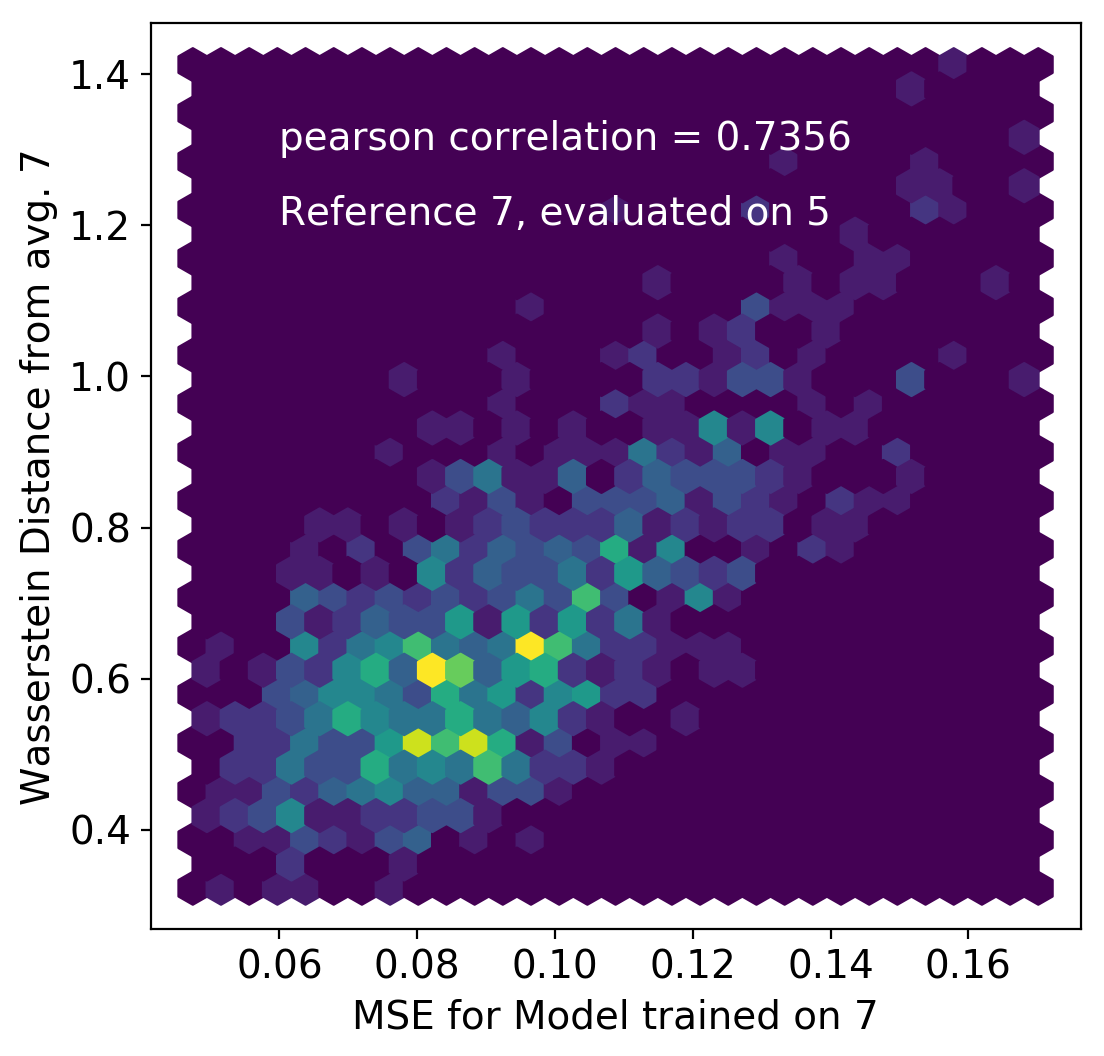

In [177]:
plt.hexbin(loss_list,wasserstein_list,gridsize=30)
plt.xlabel('MSE for Model trained on 7')
plt.ylabel('Wasserstein Distance from avg. 7')
plt.text(0.06,1.3,f'pearson correlation = {pearsonr_test[0]:.4f}',color='white')
plt.text(0.06,1.2,f'Reference 7, evaluated on 5',color='white')

In [91]:
mean_norm_image

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [108]:
from geomloss import SamplesLoss

loss = SamplesLoss(loss="sinkhorn", p=2, blur=.00001)

In [25]:
import ot
import ot.plot

In [26]:
testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

In [27]:
test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1,
            shuffle=False)

In [28]:
import time

In [29]:
for i, (x,y) in enumerate(test_loader):
    
    start = time.time()
    norm = x/255.
    M = ot.dist(norm.view(28,28), mean_norm_image, metric='euclidean')
    end = time.time()
    print(end-start)
    print(M[:1])

8.511543273925781e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
7.224082946777344e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
7.081031799316406e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


5.5789947509765625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.650520324707031e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.435943603515625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

0.0015125274658203125
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
0.0002613067626953125
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.4836273193359375e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

5.507469177246094e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.698204040527344e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.412101745605469e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


5.3882598876953125e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
6.413459777832031e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.817413330078125e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

0.0015842914581298828
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
0.00010776519775390625
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.555152893066406e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

0.0015497207641601562
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
0.0003018379211425781
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.53131103515625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 

5.626678466796875e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.745887756347656e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.817413330078125e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


5.5789947509765625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
6.0558319091796875e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.745887756347656e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

0.0015897750854492188
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
0.0002837181091308594
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.53131103515625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 

6.866455078125e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
7.62939453125e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.602836608886719e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.350

5.364418029785156e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
7.605552673339844e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.626678466796875e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


5.435943603515625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.91278076171875e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.602836608886719e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 

5.7697296142578125e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.841255187988281e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.555152893066406e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5.412101745605469e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.507469177246094e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.340576171875e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8

0.0016222000122070312
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
0.00010704994201660156
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.555152893066406e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

0.0015406608581542969
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
0.0002186298370361328
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.5789947509765625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

5.5789947509765625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.602836608886719e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.507469177246094e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

5.5789947509765625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.5789947509765625e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.35052395e-06 3.00787392e-04 3.65073685e-03 1.47620681e-02
  2.56705689e-02 2.78363076e-02 2.28323641e-02 1.75542200e-02
  1.50141646e-02 1.42641857e-02 1.44260260e-02 1.48194359e-02
  1.49214248e-02 1.45679524e-02 1.38867605e-02 1.31314719e-02
  1.25083185e-02 1.19654776e-02 1.15089887e-02 1.10091557e-02
  1.02125910e-02 8.43720816e-03 4.62715214e-03 5.94130848e-04]]
5.91278076171875e-05
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

In [55]:
def get_loss_and_wasserstein(digit):
    print("begin")
    testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

    indices = testdataset.targets == digit

    testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]

    test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1000,
            shuffle=False)

    loss_list = np.array([])
    for i, (x,y) in enumerate(test_loader):

        VAE_loss = torch.mean((vae(x.to(device)).view(-1,784)- x.to(device).view(-1,784))**2,dim=1).data.cpu().numpy()
        print(VAE_loss.shape)
        loss_list = np.append(loss_list,VAE_loss)

    test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1,
            shuffle=False)

    #wasserstein_list = np.array([])
    #wasserstein_scipy_list = np.array([])
    wasserstein_ot_list = np.array([])
    M = ot.dist(x[0].view(28,28), mean_norm_image, metric='euclidean')
    for i, (x,y) in enumerate(test_loader):
        print(i)
        norm_image = x/x.sum()
        print(norm_image.view(28,28).numpy().shape)
        print(mean_norm_image.shape)
        #M = ot.dist(norm_image.view(28,28), mean_norm_image, metric='euclidean')
        wasserstein_ot_list = np.append(wasserstein_ot_list, ot.lp.emd2(norm_image.view(28,28).numpy(),mean_norm_image, M, processes = 2) )
        #wasserstein_list = np.append(wasserstein_list,loss(norm_image.view(28,28).to(device),mean_norm_image.to(device)).data.cpu().numpy())
        #wasserstein_scipy_list = np.append(wasserstein_scipy_list,wasserstein_distance(x.view(784).data.cpu().numpy(),mean_image.view(784).data.cpu().numpy()))
        
    #return loss_list, wasserstein_list, wasserstein_scipy_list
    return loss_list, wasserstein_ot_list

In [ ]:
five_loss, five_ot = get_loss_and_wasserstein(5)

begin
(892,)
0
(28, 28)
(28, 28)


Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/data/t3home000/spark/miniconda3/envs/fewshot/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/data/t3home000/spark/miniconda3/envs/fewshot/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/data/t3home000/spark/miniconda3/envs/fewshot/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/data/t3home000/spark/miniconda3/envs/fewshot/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/data/t3home000/spark/miniconda3/envs/fewshot/lib/python3.7/site-packages/ot/utils.py", line 237, in fun
    q_out.put((i, f(x)))
  File "/data/t3home000/spark/miniconda3/envs/fewshot/lib/python3.7/site-packages/ot/utils.py", line 237, in fun
    q_out.put((i, f(x)))
  File "/data/t3home000/sp

In [110]:
five_loss, five_wass, five_scipy = get_loss_and_wasserstein(5)

(892,)
0
tensor(1.0000)
1
tensor(1.)
2
tensor(1.0000)
3
tensor(1.)
4
tensor(1.0000)
5
tensor(1.0000)
6
tensor(1.)
7
tensor(1.0000)
8
tensor(1.)
9
tensor(1.0000)
10
tensor(1.0000)
11
tensor(1.)
12
tensor(1.)
13
tensor(1.0000)
14
tensor(1.0000)
15
tensor(1.0000)
16
tensor(1.)
17
tensor(1.)
18
tensor(1.)
19
tensor(1.)
20
tensor(1.0000)
21
tensor(1.)
22
tensor(1.0000)
23
tensor(1.0000)
24
tensor(1.0000)
25
tensor(1.0000)
26
tensor(1.)
27
tensor(1.0000)
28
tensor(1.)
29
tensor(1.)
30
tensor(1.)
31
tensor(1.0000)
32
tensor(1.0000)
33
tensor(1.0000)
34
tensor(1.)
35
tensor(1.)
36
tensor(1.)
37
tensor(1.0000)
38
tensor(1.)
39
tensor(1.0000)
40
tensor(1.0000)
41
tensor(1.0000)
42
tensor(1.)
43
tensor(1.)
44
tensor(1.)
45
tensor(1.)
46
tensor(1.0000)
47
tensor(1.)
48
tensor(1.)
49
tensor(1.)
50
tensor(1.)
51
tensor(1.)
52
tensor(1.0000)
53
tensor(1.)
54
tensor(1.0000)
55
tensor(1.0000)
56
tensor(1.)
57
tensor(1.0000)
58
tensor(1.)
59
tensor(1.)
60
tensor(1.0000)
61
tensor(1.0000)
62
tensor(1.)
6

501
tensor(1.0000)
502
tensor(1.)
503
tensor(1.0000)
504
tensor(1.)
505
tensor(1.)
506
tensor(1.0000)
507
tensor(1.0000)
508
tensor(1.0000)
509
tensor(1.0000)
510
tensor(1.0000)
511
tensor(1.0000)
512
tensor(1.0000)
513
tensor(1.)
514
tensor(1.0000)
515
tensor(1.0000)
516
tensor(1.)
517
tensor(1.)
518
tensor(1.0000)
519
tensor(1.0000)
520
tensor(1.0000)
521
tensor(1.)
522
tensor(1.)
523
tensor(1.0000)
524
tensor(1.0000)
525
tensor(1.0000)
526
tensor(1.0000)
527
tensor(1.0000)
528
tensor(1.0000)
529
tensor(1.)
530
tensor(1.)
531
tensor(1.)
532
tensor(1.)
533
tensor(1.0000)
534
tensor(1.)
535
tensor(1.0000)
536
tensor(1.)
537
tensor(1.)
538
tensor(1.)
539
tensor(1.)
540
tensor(1.)
541
tensor(1.)
542
tensor(1.0000)
543
tensor(1.)
544
tensor(1.)
545
tensor(1.0000)
546
tensor(1.)
547
tensor(1.0000)
548
tensor(1.)
549
tensor(1.)
550
tensor(1.0000)
551
tensor(1.)
552
tensor(1.)
553
tensor(1.)
554
tensor(1.)
555
tensor(1.)
556
tensor(1.0000)
557
tensor(1.)
558
tensor(1.0000)
559
tensor(1.0000)

In [111]:
seven_loss, seven_wass, seven_scipy = get_loss_and_wasserstein(7);

(1000,)
(28,)
0
tensor(1.)
1
tensor(1.0000)
2
tensor(1.0000)
3
tensor(1.)
4
tensor(1.)
5
tensor(1.0000)
6
tensor(1.)
7
tensor(1.)
8
tensor(1.)
9
tensor(1.0000)
10
tensor(1.0000)
11
tensor(1.)
12
tensor(1.)
13
tensor(1.0000)
14
tensor(1.)
15
tensor(1.0000)
16
tensor(1.0000)
17
tensor(1.0000)
18
tensor(1.0000)
19
tensor(1.)
20
tensor(1.0000)
21
tensor(1.0000)
22
tensor(1.)
23
tensor(1.)
24
tensor(1.)
25
tensor(1.)
26
tensor(1.0000)
27
tensor(1.)
28
tensor(1.0000)
29
tensor(1.0000)
30
tensor(1.)
31
tensor(1.)
32
tensor(1.)
33
tensor(1.0000)
34
tensor(1.0000)
35
tensor(1.)
36
tensor(1.)
37
tensor(1.)
38
tensor(1.)
39
tensor(1.)
40
tensor(1.)
41
tensor(1.)
42
tensor(1.)
43
tensor(1.)
44
tensor(1.)
45
tensor(1.)
46
tensor(1.0000)
47
tensor(1.0000)
48
tensor(1.0000)
49
tensor(1.)
50
tensor(1.0000)
51
tensor(1.)
52
tensor(1.)
53
tensor(1.0000)
54
tensor(1.)
55
tensor(1.0000)
56
tensor(1.0000)
57
tensor(1.)
58
tensor(1.)
59
tensor(1.0000)
60
tensor(1.0000)
61
tensor(1.0000)
62
tensor(1.0000)
63

501
tensor(1.)
502
tensor(1.)
503
tensor(1.0000)
504
tensor(1.0000)
505
tensor(1.0000)
506
tensor(1.)
507
tensor(1.0000)
508
tensor(1.)
509
tensor(1.)
510
tensor(1.)
511
tensor(1.)
512
tensor(1.0000)
513
tensor(1.0000)
514
tensor(1.0000)
515
tensor(1.0000)
516
tensor(1.)
517
tensor(1.)
518
tensor(1.)
519
tensor(1.)
520
tensor(1.0000)
521
tensor(1.)
522
tensor(1.)
523
tensor(1.)
524
tensor(1.)
525
tensor(1.0000)
526
tensor(1.)
527
tensor(1.)
528
tensor(1.)
529
tensor(1.)
530
tensor(1.)
531
tensor(1.0000)
532
tensor(1.0000)
533
tensor(1.)
534
tensor(1.0000)
535
tensor(1.)
536
tensor(1.)
537
tensor(1.)
538
tensor(1.)
539
tensor(1.0000)
540
tensor(1.0000)
541
tensor(1.)
542
tensor(1.)
543
tensor(1.0000)
544
tensor(1.0000)
545
tensor(1.0000)
546
tensor(1.0000)
547
tensor(1.)
548
tensor(1.0000)
549
tensor(1.)
550
tensor(1.)
551
tensor(1.)
552
tensor(1.)
553
tensor(1.0000)
554
tensor(1.0000)
555
tensor(1.)
556
tensor(1.0000)
557
tensor(1.)
558
tensor(1.0000)
559
tensor(1.)
560
tensor(1.)
561


998
tensor(1.)
999
tensor(1.)
1000
tensor(1.0000)
1001
tensor(1.0000)
1002
tensor(1.)
1003
tensor(1.)
1004
tensor(1.)
1005
tensor(1.0000)
1006
tensor(1.)
1007
tensor(1.0000)
1008
tensor(1.)
1009
tensor(1.)
1010
tensor(1.)
1011
tensor(1.0000)
1012
tensor(1.)
1013
tensor(1.)
1014
tensor(1.0000)
1015
tensor(1.)
1016
tensor(1.)
1017
tensor(1.0000)
1018
tensor(1.)
1019
tensor(1.)
1020
tensor(1.0000)
1021
tensor(1.0000)
1022
tensor(1.)
1023
tensor(1.0000)
1024
tensor(1.)
1025
tensor(1.0000)
1026
tensor(1.0000)
1027
tensor(1.0000)


In [112]:
nine_loss, nine_wass, nine_scipy = get_loss_and_wasserstein(9)

(1000,)
(9,)
0
tensor(1.)
1
tensor(1.)
2
tensor(1.0000)
3
tensor(1.)
4
tensor(1.)
5
tensor(1.)
6
tensor(1.0000)
7
tensor(1.)
8
tensor(1.)
9
tensor(1.)
10
tensor(1.0000)
11
tensor(1.)
12
tensor(1.0000)
13
tensor(1.)
14
tensor(1.0000)
15
tensor(1.0000)
16
tensor(1.)
17
tensor(1.0000)
18
tensor(1.)
19
tensor(1.)
20
tensor(1.)
21
tensor(1.0000)
22
tensor(1.0000)
23
tensor(1.)
24
tensor(1.0000)
25
tensor(1.)
26
tensor(1.0000)
27
tensor(1.)
28
tensor(1.0000)
29
tensor(1.0000)
30
tensor(1.0000)
31
tensor(1.0000)
32
tensor(1.)
33
tensor(1.)
34
tensor(1.)
35
tensor(1.0000)
36
tensor(1.)
37
tensor(1.)
38
tensor(1.)
39
tensor(1.0000)
40
tensor(1.0000)
41
tensor(1.)
42
tensor(1.)
43
tensor(1.)
44
tensor(1.)
45
tensor(1.)
46
tensor(1.)
47
tensor(1.)
48
tensor(1.)
49
tensor(1.0000)
50
tensor(1.)
51
tensor(1.)
52
tensor(1.)
53
tensor(1.)
54
tensor(1.0000)
55
tensor(1.)
56
tensor(1.0000)
57
tensor(1.)
58
tensor(1.)
59
tensor(1.)
60
tensor(1.0000)
61
tensor(1.)
62
tensor(1.)
63
tensor(1.0000)
64
tensor

504
tensor(1.)
505
tensor(1.)
506
tensor(1.0000)
507
tensor(1.0000)
508
tensor(1.0000)
509
tensor(1.)
510
tensor(1.0000)
511
tensor(1.0000)
512
tensor(1.)
513
tensor(1.)
514
tensor(1.)
515
tensor(1.)
516
tensor(1.0000)
517
tensor(1.)
518
tensor(1.)
519
tensor(1.0000)
520
tensor(1.0000)
521
tensor(1.0000)
522
tensor(1.0000)
523
tensor(1.)
524
tensor(1.0000)
525
tensor(1.0000)
526
tensor(1.)
527
tensor(1.)
528
tensor(1.)
529
tensor(1.0000)
530
tensor(1.)
531
tensor(1.)
532
tensor(1.)
533
tensor(1.0000)
534
tensor(1.)
535
tensor(1.)
536
tensor(1.)
537
tensor(1.0000)
538
tensor(1.)
539
tensor(1.)
540
tensor(1.)
541
tensor(1.0000)
542
tensor(1.)
543
tensor(1.)
544
tensor(1.0000)
545
tensor(1.0000)
546
tensor(1.)
547
tensor(1.0000)
548
tensor(1.0000)
549
tensor(1.)
550
tensor(1.)
551
tensor(1.0000)
552
tensor(1.)
553
tensor(1.0000)
554
tensor(1.0000)
555
tensor(1.)
556
tensor(1.)
557
tensor(1.)
558
tensor(1.0000)
559
tensor(1.)
560
tensor(1.)
561
tensor(1.0000)
562
tensor(1.)
563
tensor(1.00

1008
tensor(1.0000)


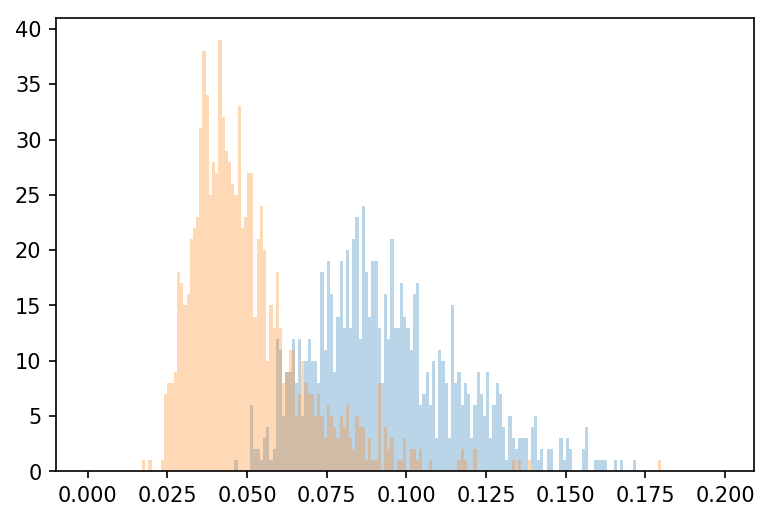

In [113]:
plt.hist(five_loss,bins=np.arange(0,0.2,0.001),alpha=0.3);
plt.hist(nine_loss,bins=np.arange(0,0.2,0.001),alpha=0.3);

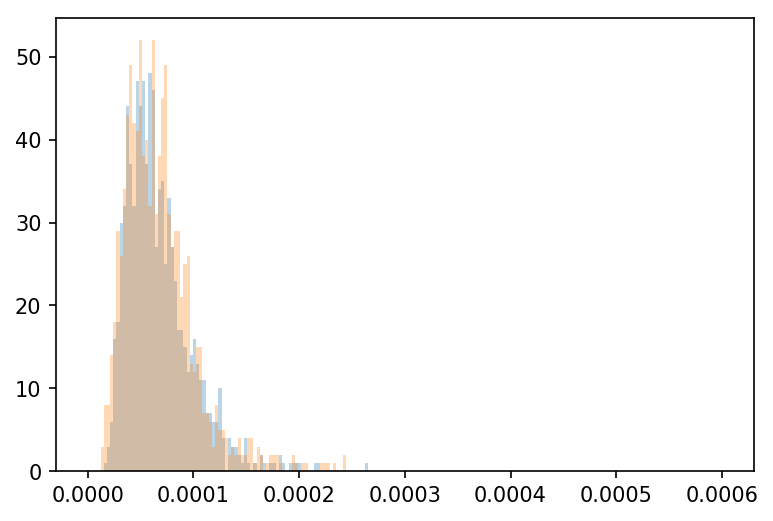

In [119]:
plt.hist(five_wass,bins=np.linspace(0,0.0006,200),alpha=0.3);
plt.hist(seven_wass,bins=np.linspace(0,0.0006,200),alpha=0.3);

In [229]:
def get_tpr_fpr(sigloss,bkgloss,range_low, range_high, aetype='bkg'):
    bins = np.linspace(range_low,range_high,1001)
    tpr = []
    fpr = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss<cut)[0].shape[0]/len(bkgloss))
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss>cut)[0].shape[0]/len(bkgloss))
    return tpr,fpr  

In [230]:
loss_tpr, loss_fpr = get_tpr_fpr(five_loss, seven_loss, 0, 0.2)

In [231]:
wass_tpr, wass_fpr = get_tpr_fpr(five_wass, seven_wass, 0.2, 1.8)

Text(0, 0.5, 'tpr')

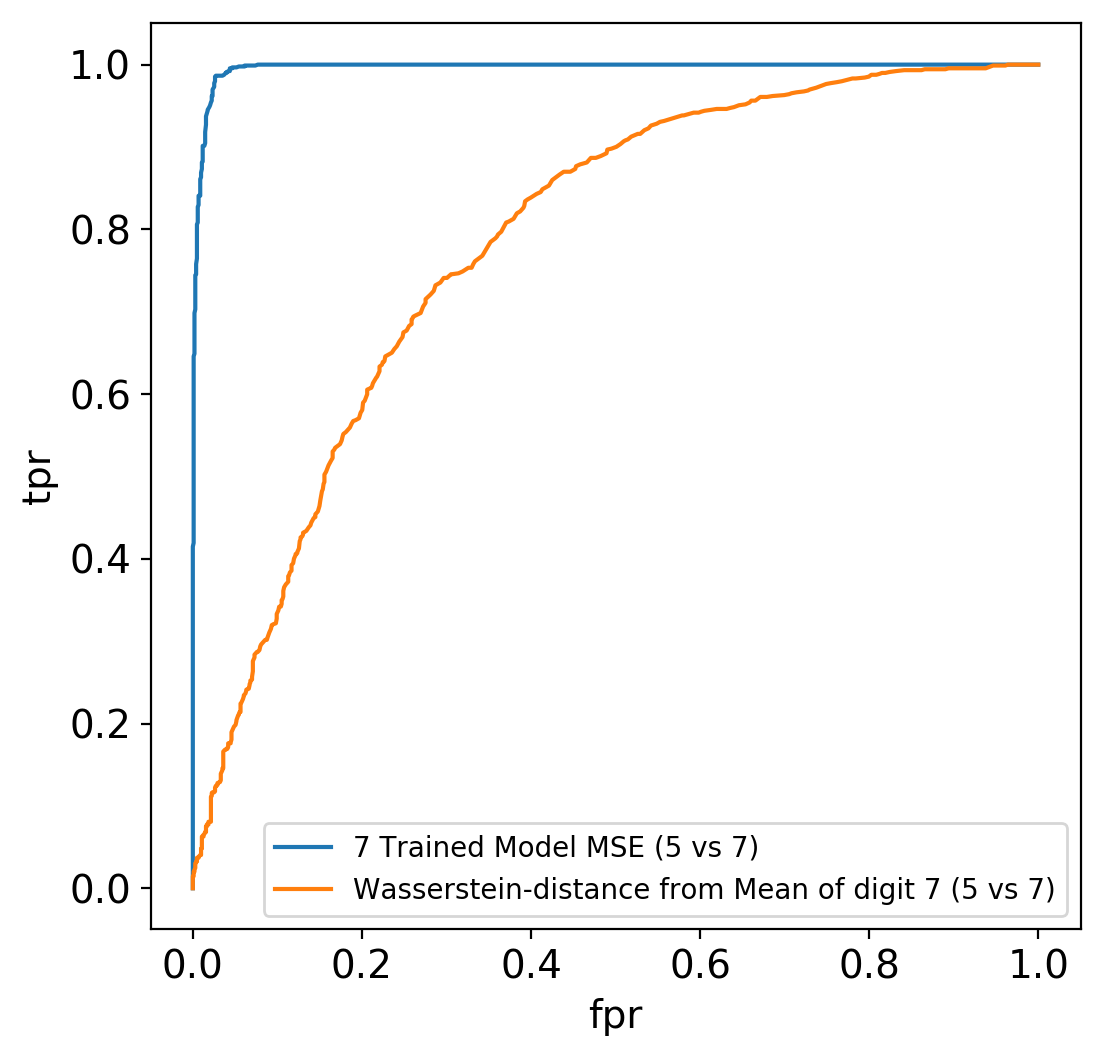

In [232]:
plt.plot(loss_fpr, loss_tpr, label='7 Trained Model MSE (5 vs 7)')
plt.plot(wass_fpr, wass_tpr, label='Wasserstein-distance from Mean of digit 7 (5 vs 7)')
plt.legend(loc=4,fontsize=10)
plt.xlabel('fpr')
plt.ylabel('tpr')